## Fetch data

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

In [2]:
sns.set_style('whitegrid') # background
get_ipython().magic(u'matplotlib inline')

In [3]:
stonks_df = pd.read_csv('stonks.csv')
stonk_tickers = stonks_df['STOCK SYMBOL'].dropna().tolist()

# Remove TSE stonks missing too much data
stonk_tickers = [t for t in stonk_tickers if not t.startswith('TSE:')]

now = datetime.now()

# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# (optional, default is '1mo')
period = '1y'

# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
# (optional, default is '1d')
interval = '1d'

data = yf.download(" ".join(stonk_tickers), period=period, interval=interval)

# reassign stonk tickers
stonk_tickers = data.columns.levels[1].tolist()

[*********************100%***********************]  30 of 30 completed

4 Failed downloads:
- HBLK: No data found, symbol may be delisted
- CYBR.B: No data found, symbol may be delisted
- RBOT: No data found for this date range, symbol may be delisted
- XIU: No data found for this date range, symbol may be delisted


### Preview data

In [4]:
print(stonk_tickers)

['AAPL', 'AMD', 'ATVI', 'BB', 'BUZZ', 'BYND', 'COUR', 'CRWD', 'CYBR.B', 'DDOG', 'DELL', 'F', 'FSLY', 'FWONK', 'HBLK', 'HMC', 'LIT', 'LMND', 'MSFT', 'NKE', 'RBOT', 'SMH', 'SONY', 'TM', 'TWLO', 'U', 'WMT', 'WORK', 'XIU', 'ZEN']


In [5]:
data.head()

Adj Close                                               \
                          AAPL        AMD       ATVI    BB BUZZ        BYND   
Date                                                                          
2020-07-17 00:00:00  95.682777  55.040001  78.261070  4.80  NaN  128.270004   
2020-07-20 00:00:00  97.699188  57.459999  80.768929  4.99  NaN  128.500000   
2020-07-21 00:00:00  96.350784  57.000000  80.370857  4.85  NaN  129.919998   
2020-07-22 00:00:00  96.621452  61.790001  80.709213  4.79  NaN  130.570007   
2020-07-23 00:00:00  92.223587  59.570000  79.226395  4.74  NaN  127.150002   

                                                        ... Volume           \
                    COUR        CRWD CYBR.B       DDOG  ...   RBOT      SMH   
Date                                                    ...                   
2020-07-17 00:00:00  NaN  101.430000    NaN  87.300003  ...    NaN  2489100   
2020-07-20 00:00:00  NaN  106.720001    NaN  92.139999  ...    NaN  2242800   
2020-07-21 00:00:00  NaN  106.599998    NaN  90.720001  ...    NaN  3045500   
2020-07-22 00:00:00  NaN  103.709999    NaN  89.500000  ...    NaN  2364300   
2020-07-23 00:00:00  NaN  101.459999    NaN  85.220001  ...    NaN  3718000   

                                                                          \
                        SONY      TM     TWLO   U      WMT      WORK XIU   
Date                                                                       
2020-07-17 00:00:00  1091700  137000  4499300 NaN  6063200  10530100 NaN   
2020-07-20 00:00:00   875000  145600  5179900 NaN  6114200  12126200 NaN   
2020-07-21 00:00:00   698200  153000  4315200 NaN  7237500  12813900 NaN   
2020-07-22 00:00:00   417000  104800  3224200 NaN  5388200  20248600 NaN   
2020-07-23 00:00:00   608100  138800  3054100 NaN  5598800  14914100 NaN   

                              
                         ZEN  
Date                          
2020-07-17 00:00:00  2336700  
2020-07-20 00:00:00  3463200  
2020-07-21 00:00:00  2810800  
2020-07-22 00:00:00  2045000  
2020-07-23 00:00:00  2480300  

[5 rows x 180 columns]

In [6]:
def plot_risk_return(daily_returns): 
    area = np.pi*5
    plt.figure(dpi=500)
    plt.scatter(daily_returns.mean(), daily_returns.std(), s = area, marker='.')
    plt.xlabel('Expected Return')
    plt.ylabel('Risk')

    for label, x, y in zip(
        daily_returns.columns, 
        daily_returns.mean(), 
        daily_returns.std()):
        plt.annotate(
            label,
            xy = (x, y),
            xytext = (0, 0),
            textcoords = 'offset points', 
            ha = 'right', 
            va = 'bottom', 
            arrowprops = dict(
                arrowstyle = '-', 
                connectionstyle = 'arc3, rad=-0.3'))

### Daily Returns 

In [14]:
daily_returns = data['Adj Close'].pct_change()
daily_returns.head()

,AAPL,AMD,ATVI,BB,BUZZ,BYND,COUR,CRWD,CYBR.B,DDOG,...,RBOT,SMH,SONY,TM,TWLO,U,WMT,WORK,XIU,ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-20 00:00:00,0.021074,0.043968,0.032045,0.039583,NaN,0.001793,NaN,0.052154,NaN,0.055441,...,NaN,0.019974,0.027603,0.001731,0.102276,NaN,-0.002050,0.036749,NaN,0.071309
2020-07-21 00:00:00,-0.013802,-0.008006,-0.004929,-0.028056,NaN,0.011051,NaN,-0.001124,NaN,-0.015411,...,NaN,-0.005018,-0.011128,-0.007935,-0.009355,NaN,0.006541,-0.020427,NaN,-0.019241
2020-07-22 00:00:00,0.002809,0.084035,0.004210,-0.012371,NaN,0.005003,NaN,-0.027111,NaN,-0.013448,...,NaN,0.007319,0.000517,-0.000079,0.005911,NaN,0.002494,-0.051211,NaN,0.017709
2020-07-23 00:00:00,-0.045516,-0.035928,-0.018372,-0.010438,NaN,-0.026193,NaN,-0.021695,NaN,-0.047821,...,NaN,-0.016485,-0.012023,-0.003168,-0.029498,NaN,-0.007689,-0.019069,NaN,-0.012087


### Drop NaN values

In [15]:
# rets = daily_returns.dropna()
# rets.head()

In [16]:
# plot_risk_return(rets)

### Replace NaN with row mean

In [17]:
cleaned_daily_returns = daily_returns

for row in cleaned_daily_returns.iterrows(): 
    date = row[0]
    cleaned_daily_returns.loc[date] = cleaned_daily_returns.loc[date].fillna(value=cleaned_daily_returns.loc[date].mean())
    

rets = cleaned_daily_returns.dropna()
rets.head()

,AAPL,AMD,ATVI,BB,BUZZ,BYND,COUR,CRWD,CYBR.B,DDOG,...,RBOT,SMH,SONY,TM,TWLO,U,WMT,WORK,XIU,ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-20 00:00:00,0.021074,0.043968,0.032045,0.039583,0.026992,0.001793,0.026992,0.052154,0.026992,0.055441,...,0.026992,0.019974,0.027603,0.001731,0.102276,0.026992,-0.002050,0.036749,0.026992,0.071309
2020-07-21 00:00:00,-0.013802,-0.008006,-0.004929,-0.028056,-0.008727,0.011051,-0.008727,-0.001124,-0.008727,-0.015411,...,-0.008727,-0.005018,-0.011128,-0.007935,-0.009355,-0.008727,0.006541,-0.020427,-0.008727,-0.019241
2020-07-22 00:00:00,0.002809,0.084035,0.004210,-0.012371,0.002925,0.005003,0.002925,-0.027111,0.002925,-0.013448,...,0.002925,0.007319,0.000517,-0.000079,0.005911,0.002925,0.002494,-0.051211,0.002925,0.017709
2020-07-23 00:00:00,-0.045516,-0.035928,-0.018372,-0.010438,-0.014984,-0.026193,-0.014984,-0.021695,-0.014984,-0.047821,...,-0.014984,-0.016485,-0.012023,-0.003168,-0.029498,-0.014984,-0.007689,-0.019069,-0.014984,-0.012087
2020-07-24 00:00:00,-0.002477,0.165016,0.004773,-0.018987,-0.004278,-0.016201,-0.004278,-0.014094,-0.004278,-0.004459,...,-0.004278,-0.010057,0.000523,-0.005164,-0.023710,-0.004278,-0.003038,-0.020758,-0.004278,-0.007278


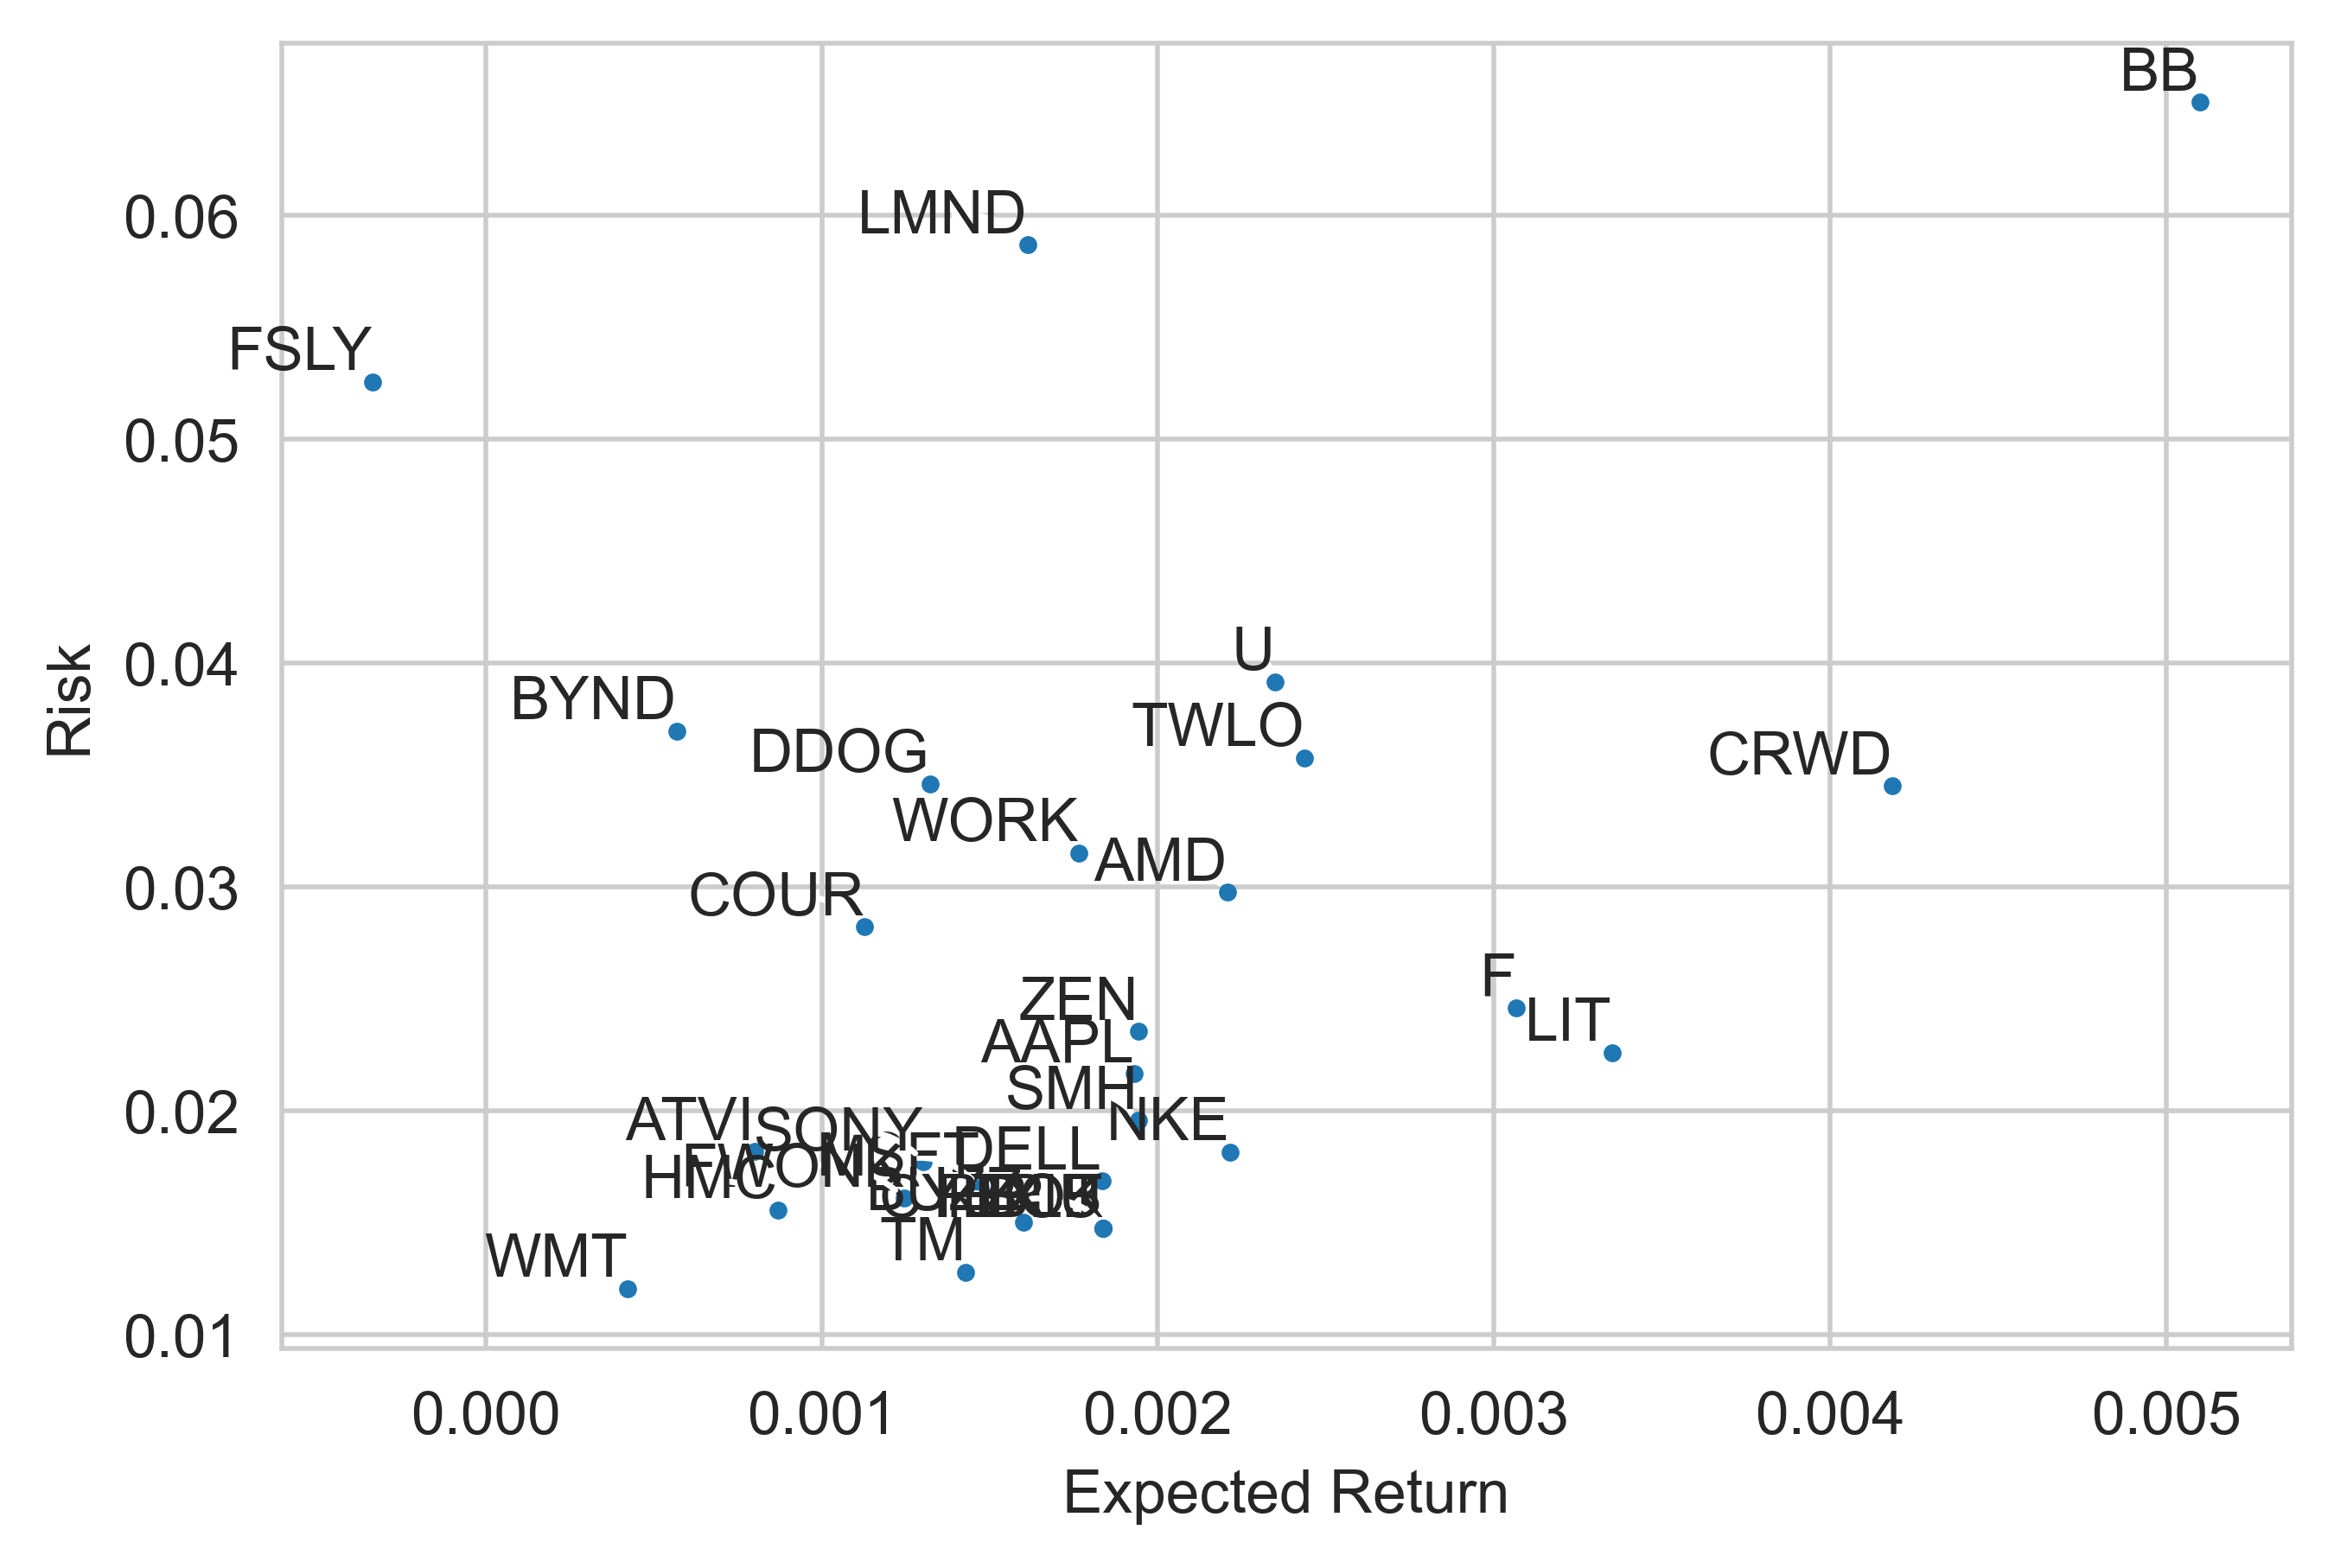

In [18]:
plot_risk_return(rets)
filename = "./img/risk_analysis/mean_{now}_-{period}.jpg".format(now=now, period=period)
plt.savefig(filename, dpi=500)

In [19]:
cleaned_daily_returns = daily_returns

for row in cleaned_daily_returns.iterrows(): 
    date = row[0]
    cleaned_daily_returns.loc[date] = cleaned_daily_returns.loc[date].fillna(value=0)
    

rets = cleaned_daily_returns.dropna()
rets.head()

,AAPL,AMD,ATVI,BB,BUZZ,BYND,COUR,CRWD,CYBR.B,DDOG,...,RBOT,SMH,SONY,TM,TWLO,U,WMT,WORK,XIU,ZEN
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-07-20 00:00:00,0.021074,0.043968,0.032045,0.039583,0.026992,0.001793,0.026992,0.052154,0.026992,0.055441,...,0.026992,0.019974,0.027603,0.001731,0.102276,0.026992,-0.002050,0.036749,0.026992,0.071309
2020-07-21 00:00:00,-0.013802,-0.008006,-0.004929,-0.028056,-0.008727,0.011051,-0.008727,-0.001124,-0.008727,-0.015411,...,-0.008727,-0.005018,-0.011128,-0.007935,-0.009355,-0.008727,0.006541,-0.020427,-0.008727,-0.019241
2020-07-22 00:00:00,0.002809,0.084035,0.004210,-0.012371,0.002925,0.005003,0.002925,-0.027111,0.002925,-0.013448,...,0.002925,0.007319,0.000517,-0.000079,0.005911,0.002925,0.002494,-0.051211,0.002925,0.017709
2020-07-23 00:00:00,-0.045516,-0.035928,-0.018372,-0.010438,-0.014984,-0.026193,-0.014984,-0.021695,-0.014984,-0.047821,...,-0.014984,-0.016485,-0.012023,-0.003168,-0.029498,-0.014984,-0.007689,-0.019069,-0.014984,-0.012087


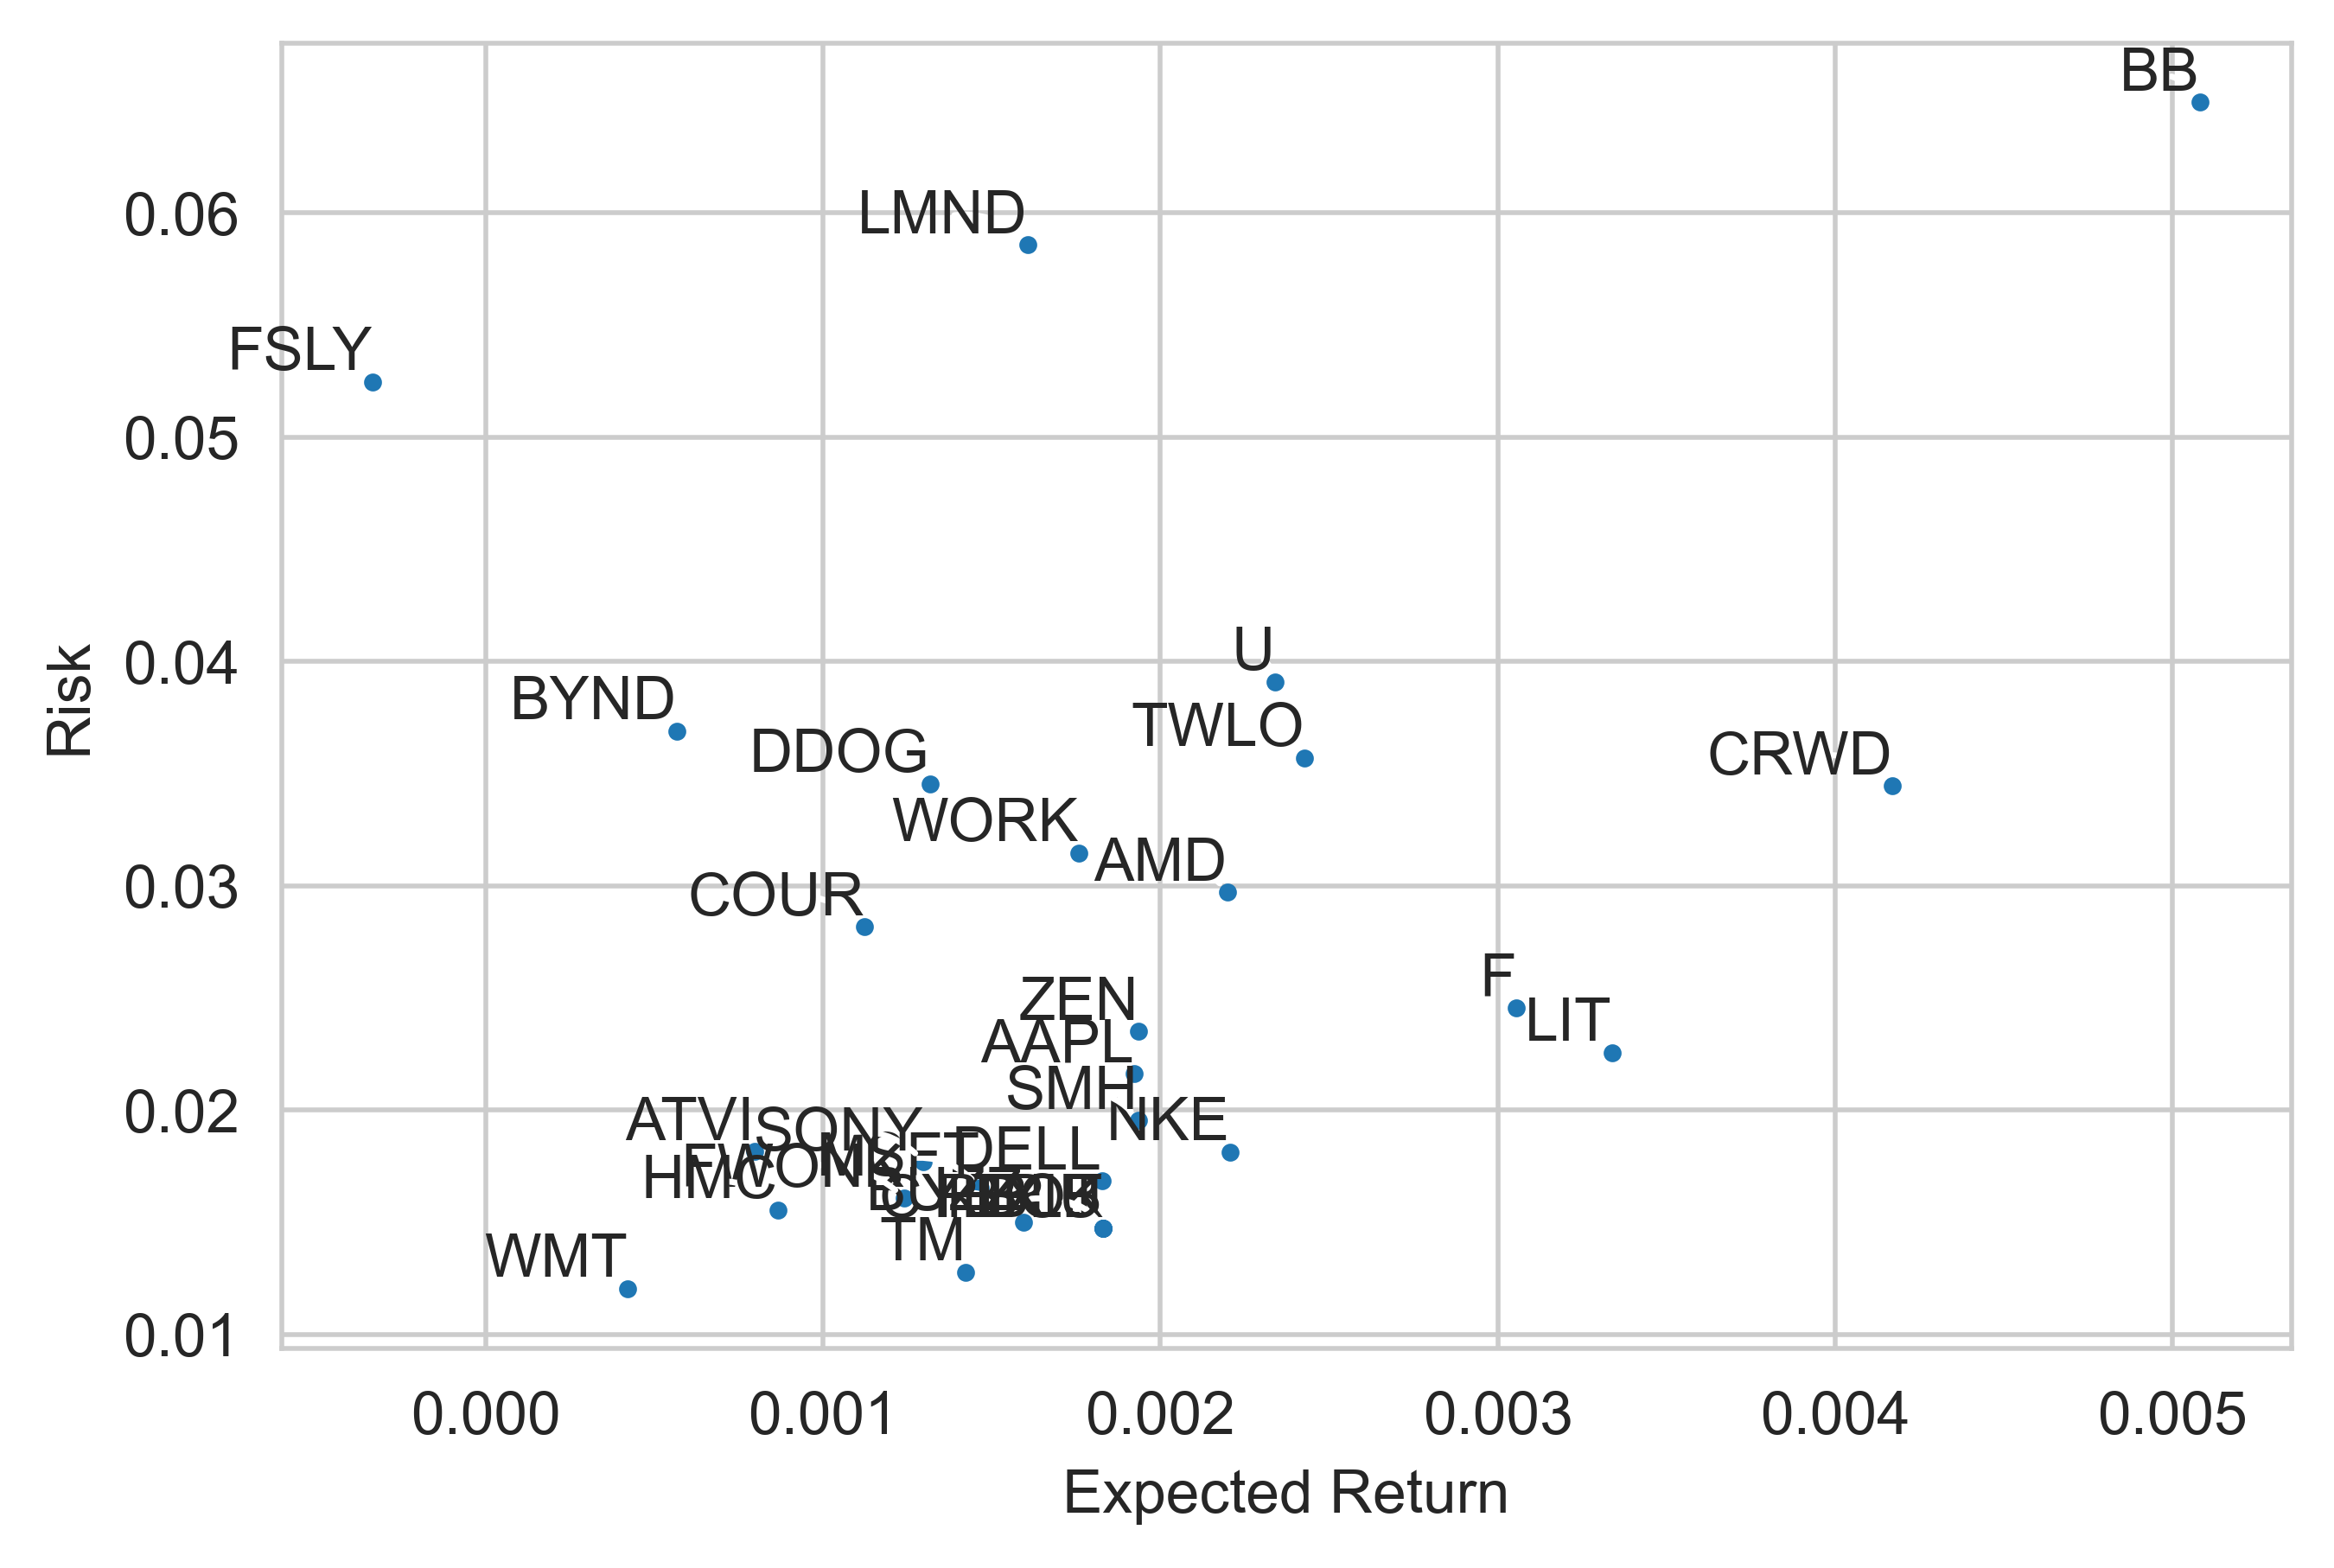

In [20]:
plot_risk_return(rets)
filename = "./img/risk_analysis/zero_{now}_-{period}.jpg".format(now=now, period=period)
plt.savefig(filename, dpi=500)